In [1]:
import librosa
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import os

In [2]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)

In [3]:
def load_data(data_dir):
    singer_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    features = []
    labels = []
    for i, singer in enumerate(singer_names):
        folder_path = os.path.join(data_dir, singer)
        
        if os.path.isdir(folder_path):
            print(f"Loading {singer} samples...")
            
            for audio_file in os.listdir(folder_path):
                if audio_file.endswith('.wav'):
                    file_path = os.path.join(folder_path, audio_file)
                    voice_features = extract_features(file_path)
                    features.append(voice_features)
                    labels.append(i)
    return np.array(features), np.array(labels), singer_names

In [4]:
data_dir1 = '/home/nirjhar/CODE/multiclass-voice-recog-V2/training'
data_dir2 = '/home/nirjhar/CODE/multiclass-voice-recog-V2/testing-5s'

In [5]:
# Load the voice data
print("Loading voice samples...")
print("TRAINING SAMPLES...")
X_train, y_train, singer_names_train = load_data(data_dir1)
print("TESTING SAMPLES...")
X_test, y_test, singer_names_test = load_data(data_dir2)
print(f"Total samples: {len(X_train) + len(X_test)}")
print(f"Features per sample: {X_train.shape[1]}")


print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Loading voice samples...
TRAINING SAMPLES...
Loading arijit samples...
Loading lata samples...
Loading shreya samples...
TESTING SAMPLES...
Loading arijit samples...
Loading lata samples...
Loading shreya samples...
Total samples: 364
Features per sample: 13
Training samples: 303
Testing samples: 61


In [6]:
# Create and train SVM classifier
model = svm.SVC(kernel='poly',
                degree=2,
                C=1.0,
                decision_function_shape='ovo')
print("Training the SVM model...")
model.fit(X_train, y_train)

Training the SVM model...


,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# Test the model
y_pred = model.predict(X_test)
print("Testing the SVM model...")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

Testing the SVM model...
Accuracy: 0.49 (49.2%)


In [8]:
# Show some predictions
print("\nSample predictions:")
for i in range(min(20, len(X_test))):
    actual = singer_names_test[y_test[i]]
    predicted = singer_names_test[y_pred[i]]
    print(f"Actual: {actual}, Predicted: {predicted}")


Sample predictions:
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: arijit, Predicted: arijit
Actual: lata, Predicted: shreya
Actual: lata, Predicted: shreya
Actual: lata, Predicted: shreya
Actual: lata, Predicted: shreya
Actual: lata, Predicted: shreya


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd

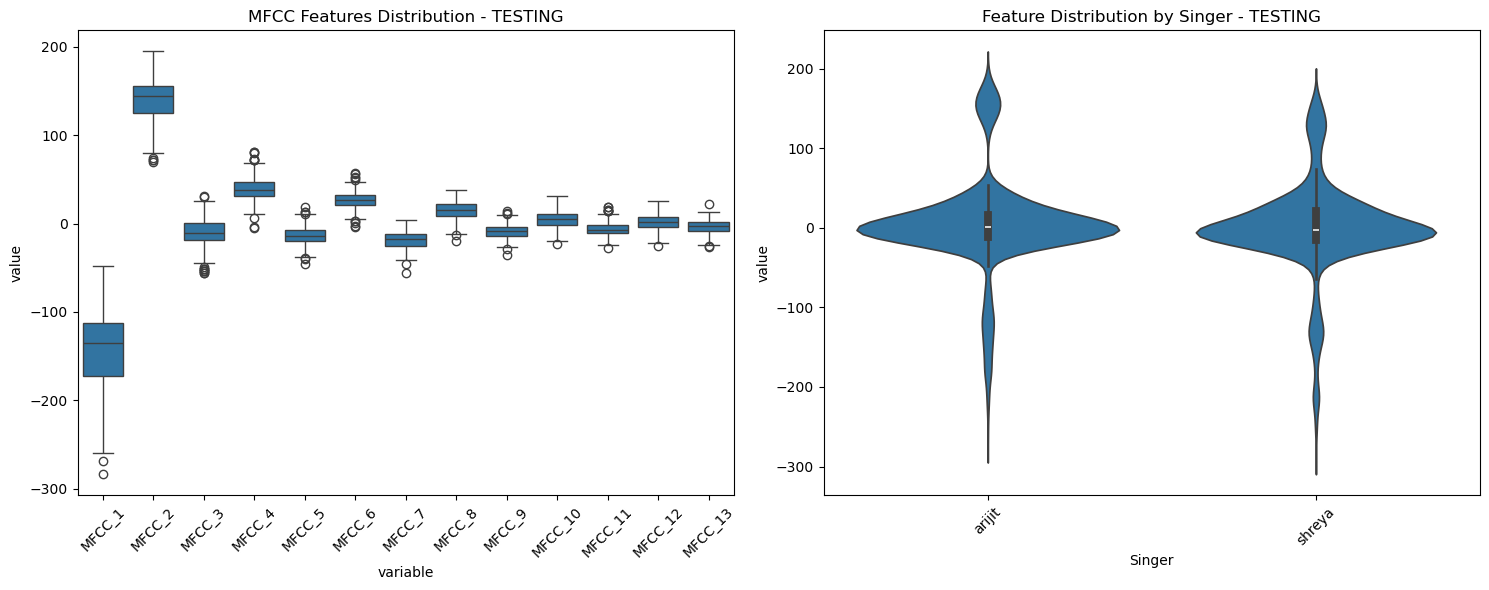

In [10]:
# Visualize MFCC feature distributions for testing
plt.figure(figsize=(15, 6))
features_df = pd.DataFrame(X_train, columns=[f'MFCC_{i+1}' for i in range(X_train.shape[1])])
features_df['Singer'] = [singer_names_test[i] for i in y_train]

plt.subplot(1, 2, 1)
sns.boxplot(data=features_df.melt(id_vars=['Singer']), x='variable', y='value')
plt.xticks(rotation=45)
plt.title('MFCC Features Distribution - TESTING')

plt.subplot(1, 2, 2)
sns.violinplot(data=features_df.melt(id_vars=['Singer']), x='Singer', y='value')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Singer - TESTING')
plt.tight_layout()
plt.show()

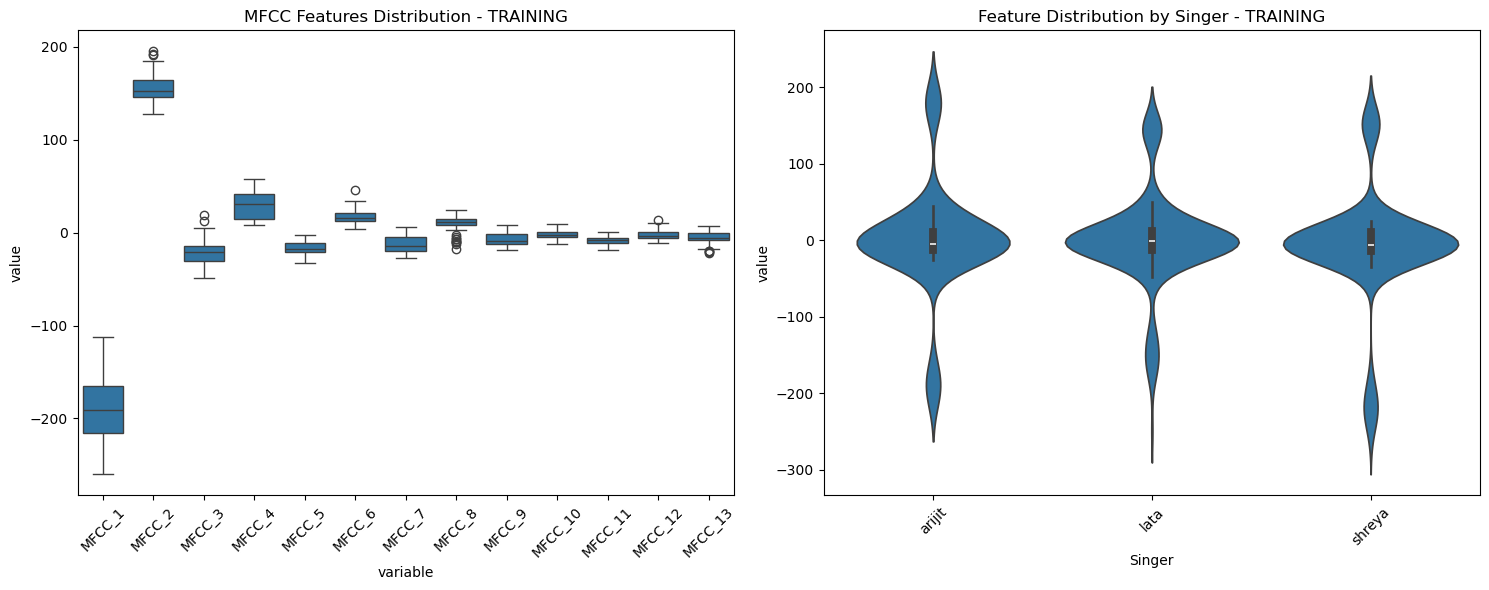

In [11]:
# Visualize MFCC feature distributions
plt.figure(figsize=(15, 6))
features_df = pd.DataFrame(X_test, columns=[f'MFCC_{i+1}' for i in range(X_test.shape[1])])
features_df['Singer'] = [singer_names_test[i] for i in y_test]

plt.subplot(1, 2, 1)
sns.boxplot(data=features_df.melt(id_vars=['Singer']), x='variable', y='value')
plt.xticks(rotation=45)
plt.title('MFCC Features Distribution - TRAINING')

plt.subplot(1, 2, 2)
sns.violinplot(data=features_df.melt(id_vars=['Singer']), x='Singer', y='value')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Singer - TRAINING')
plt.tight_layout()
plt.show()

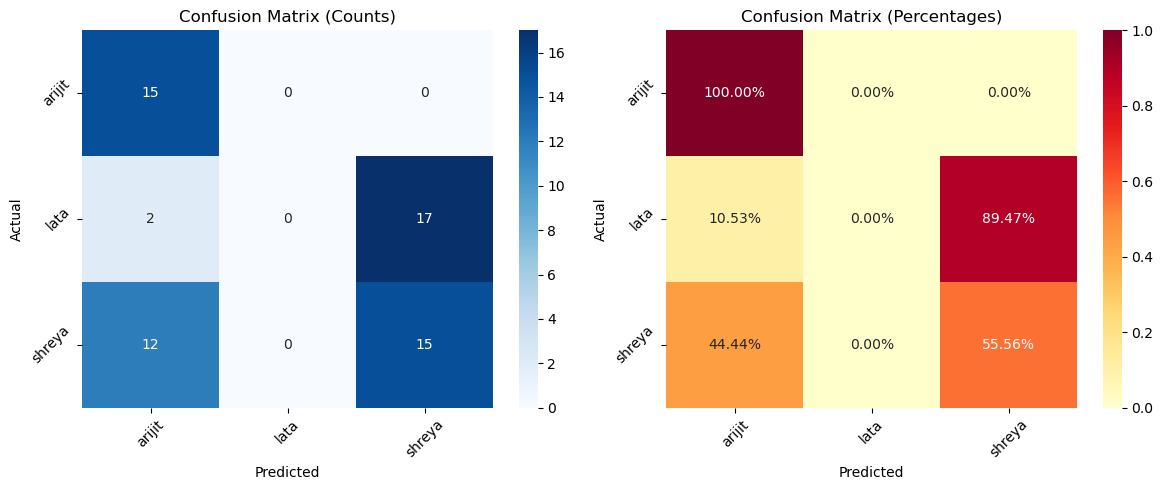

In [12]:
# Confusion matrix visualization
def plot_confusion_matrix():
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(12, 5))
    
    # Absolute numbers
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=singer_names_test,
                yticklabels=singer_names_test)
    plt.title('Confusion Matrix (Counts)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    # Percentages
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='YlOrRd',
                xticklabels=singer_names_test,
                yticklabels=singer_names_test)
    plt.title('Confusion Matrix (Percentages)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrix()